In [1]:
%pylab inline
from pygadgetreader import *


Populating the interactive namespace from numpy and matplotlib


In [3]:
LMCMW_pos = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
LMCMW_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
LMCMW_pid = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [4]:
R = np.sqrt(LMCMW_pos[:,0]**2.0 + LMCMW_pos[:,1]**2.0 + LMCMW_pos[:,2]**2.0)
V = np.sqrt(LMCMW_vel[:,0]**2.0 + LMCMW_vel[:,1]**2.0 + LMCMW_vel[:,2]**2.0)

In [10]:
index = np.where(R-50 == min(np.abs(R-50)))[0]

In [11]:
print index

[1111175]


In [17]:
print R[index]
print V[index]
pid = LMCMW_pid[index]

[ 50.00001907]
[ 190.05067444]


In [15]:
def N_body_orbit(snap_n, p_id):
    LMCMW_pos = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:03d}.hdf5'.format(snap_n), 'pos', 'dm')
    LMCMW_mass = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:03d}.hdf5'.format(snap_n), 'mass', 'dm')
    LMCMW_pid = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:03d}.hdf5'.format(snap_n), 'pid', 'dm')
    
    index_id = np.where(LMCMW_pid == p_id)[0]
    return LMCMW_pos[index_id]

In [59]:
def particle_orbit(N_snaps, pid):
    particle_pos = np.zeros((150,3))
    for i in range(N_snaps):
        particle_pos[i] = N_body_orbit(i, pid)[0]
    p_pos = LMCMW_pos[index]
    p_vel = LMCMW_vel[index]
    return particle_pos
    

In [61]:
p_orbit = particle_orbit(10, pid)

Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs


(-90, 90)

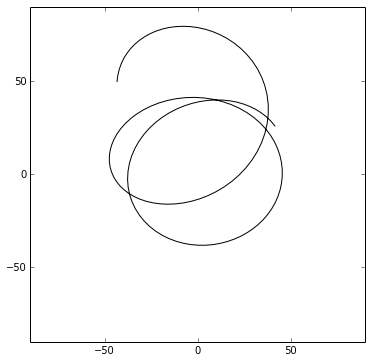

In [54]:
figure(figsize=(6,6))
plot(particle_orbit[:,0], particle_orbit[:,1], lw=1, c='k')
xlim(-90, 90)
ylim(-90, 90)